# 1.演示一下自编的OTM斜抛运动类
从（0，100）点开始，以$V_0=20m/s$的初速度，$\theta=60^{\circ}$的初角度发射后的轨迹，以及速度变化。

其中阻力系数为0.1，仿真时长为3秒，步长取为0.1s

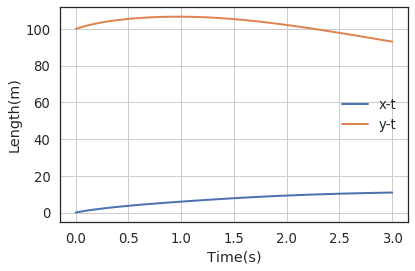

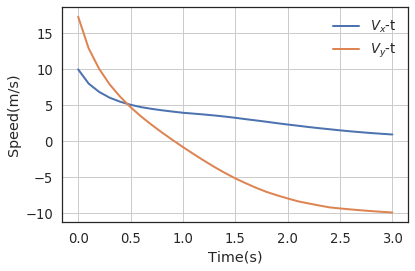

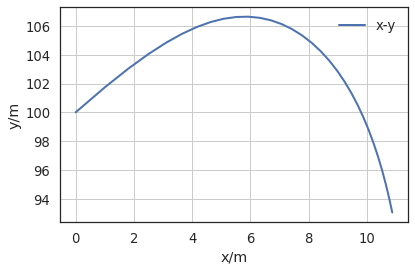

In [15]:
import OTM as otm
import numpy as np
a=otm.OTM(0,100,20,np.pi/3,0.1,3,0.1)
a.Show_xy_t()
a.Show_Vxy_t()
a.Show_position()

# 2.仿真老师的炮弹例子

注意，此例子中设置：

$$
\begin{aligned}
y_0&=100\\
V_0&=500m/s\\
\theta&=0
\end{aligned}
$$

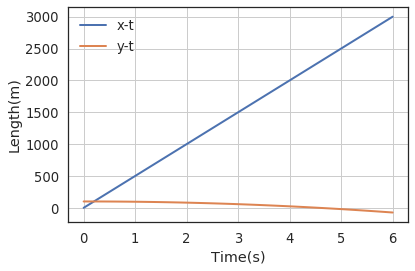

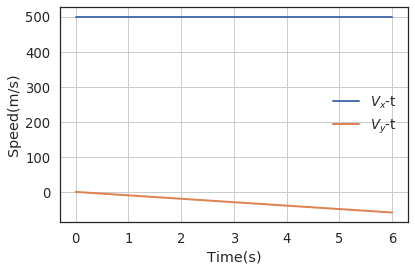

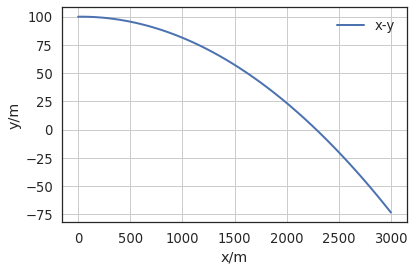

In [16]:
b=otm.OTM(0,100,500,0,0,6,0.1)
b.Show_xy_t()
b.Show_Vxy_t()
b.Show_position()

# 3.绘制OTM.cpp代码运行的数据

C++写的平抛运动代码
需要先读取OTM_cpp_data.txt文件中写入的运行数据

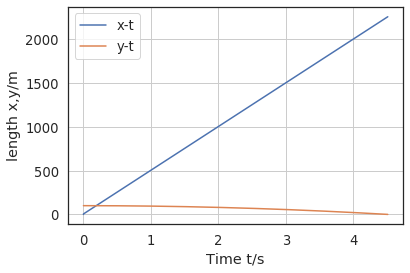

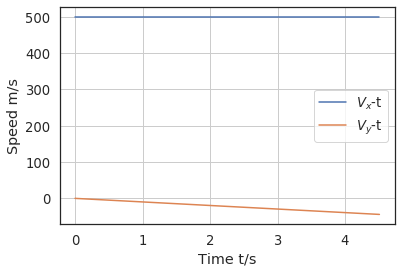

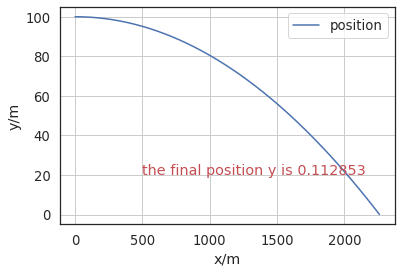

In [17]:
datac=np.loadtxt('OTM_cpp_data.txt')
tc=datac[0]
xc=datac[1]
yc=datac[2]
vxc=datac[3]
vyc=datac[4]
import matplotlib.pyplot as plt

#图1
plt.plot(tc,xc,label='x-t')
plt.plot(tc,yc,label='y-t')
plt.legend()
plt.xlabel('Time t/s')
plt.ylabel('length x,y/m')
plt.grid(True)
plt.show()

#图2
plt.plot(tc,vxc,label='$V_x$-t')
plt.plot(tc,vyc,label='$V_y$-t')
plt.legend()
plt.xlabel('Time t/s')
plt.ylabel('Speed m/s')
plt.grid(True)
plt.show()

#图3
plt.plot(xc,yc,label='position')
plt.legend()
plt.xlabel('x/m')
plt.ylabel('y/m')
plt.grid(True)
plt.text(500,20,'the final position y is '+str(yc[-1]),color='r')
plt.show()

# 4.处理老师的阻力问题作业跳伞运动员

调用OTM中的OTM类别以仿真，但是需要设置初始情况：
$$
\begin{aligned}
y_0&=1000m\\
V_0&=0m/s\\
\theta&=-\frac{\pi}{2}\\
k&=\frac{1}{2}\rho S C_d
\end{aligned}
$$

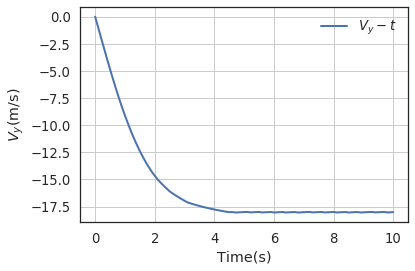

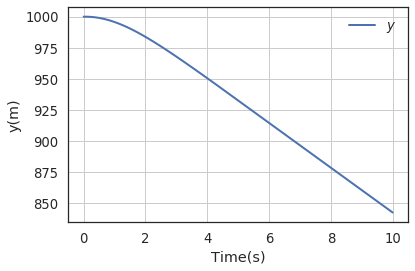

In [18]:
rho=1.225
S=1
Cd=0.05
k=rho*S*Cd/2
g=9.8
import modsim as ms
jump=otm.OTM(y0=1000,V0=0,theta=-np.pi/2,drag_k=k,t=10)

#绘制vy曲线
ms.plot(jump.frame.vy,label='$V_y-t$')
ms.decorate(xlabel='Time(s)',ylabel='$V_y$(m/s)')
plt.grid(True)
plt.show()

#绘制y曲线
ms.plot(jump.frame.y,label='$y$')
ms.decorate(xlabel='Time(s)',ylabel='y(m)')
plt.grid(True)
plt.show()

# 5.龙格-库塔(Runge-Kutta)改进该跳伞问题

看起来似乎确实比欧拉法要精度更高一些

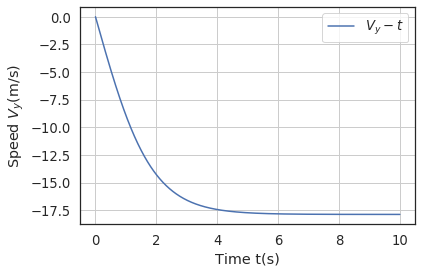

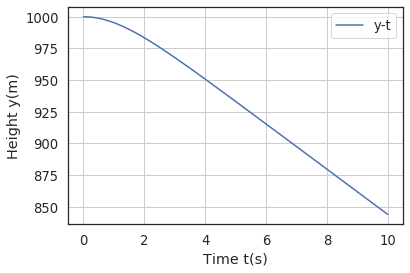

In [19]:
import my_RK4 as rk4#导入自编四阶Runge-Kutta模块
#定义ay=y''=f(t,y,vy)=f(t,y,y')=-g-ky'|y'|
def jump_fyv(t,y,Vy):
    ay=-g-k*Vy*np.abs(Vy)
    return ay
    pass

#调用二阶微分的龙格库塔方法
t,y,vy=rk4.RK4_2(0,1000,0,jump_fyv,h=0.01,final=10)

#绘制Vy-t
plt.plot(t,vy,label='$V_y-t$')
plt.legend()
plt.xlabel('Time t(s)')
plt.ylabel('Speed $V_y$(m/s)')
plt.grid(True)
plt.show()

#绘制y-t
plt.plot(t,y,label='y-t')
plt.legend()
plt.xlabel('Time t(s)')
plt.ylabel('Height y(m)')
plt.grid(True)
plt.show()

# 6.龙格库塔(Runge-Kutta)处理炮弹平抛问题

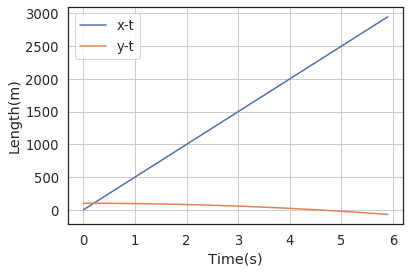

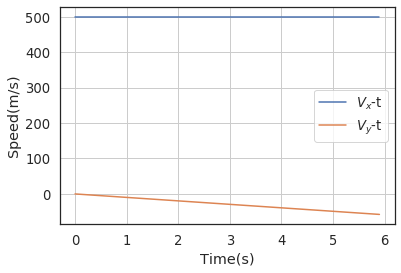

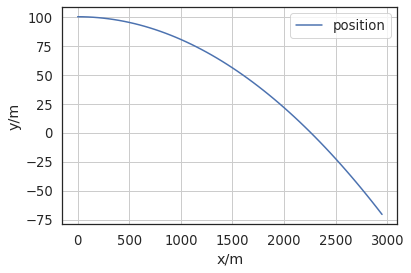

In [20]:
#x方向
def function_x(t,x,x1):
    ax=0
    return ax
    pass
#y方向
def function_y(t,y,y1):
    ay=-g
    return ay
    pass

#炮弹平抛问题所有变量用p开头
pt,px,pvx=rk4.RK4_2(0,0,500,function_x,h=0.1,final=6)
pt,py,pvy=rk4.RK4_2(0,100,0,function_y,h=0.1,final=6)

#图1
plt.plot(pt,px,label='x-t')
plt.plot(pt,py,label='y-t')
plt.legend()
plt.xlabel('Time(s)')
plt.ylabel('Length(m)')
plt.grid(True)
plt.show()

#图2
plt.plot(pt,pvx,label='$V_x$-t')
plt.plot(pt,pvy,label='$V_y$-t')
plt.legend()
plt.xlabel('Time(s)')
plt.ylabel('Speed(m/s)')
plt.grid(True)
plt.show()

#图3
plt.plot(px,py,label='position')
plt.legend()
plt.xlabel('x/m')
plt.ylabel('y/m')
plt.grid(True)
plt.show()

# 7.Adams方法仿真跳伞问题

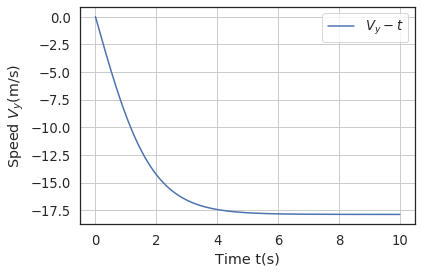

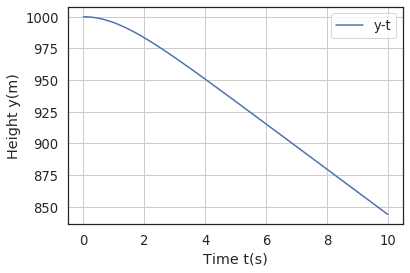

In [21]:
import my_adams as ad#导入自编库adams

def jump_fyv(t,y,Vy):
    ay=-g-k*Vy*np.abs(Vy)
    return ay
    pass

#调用二阶微分的Adams方法
t,y,vy=ad.adams_2(0,1000,0,jump_fyv,h=0.01,final=10)

#绘制Vy-t
plt.plot(t,vy,label='$V_y-t$')
plt.legend()
plt.xlabel('Time t(s)')
plt.ylabel('Speed $V_y$(m/s)')
plt.grid(True)
plt.show()

#绘制y-t
plt.plot(t,y,label='y-t')
plt.legend()
plt.xlabel('Time t(s)')
plt.ylabel('Height y(m)')
plt.grid(True)
plt.show()

# 8.Adams方法仿真炮弹平抛问题

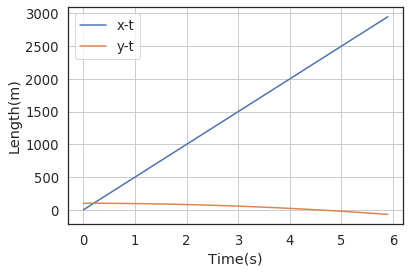

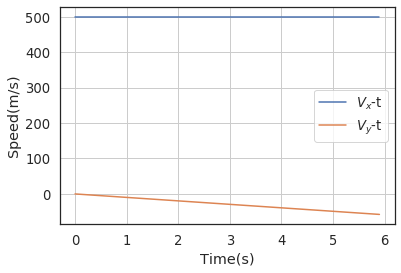

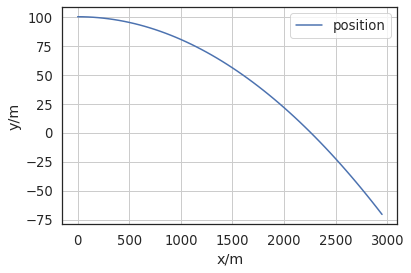

In [22]:
def function_x(t,x,x1):
    ax=0
    return ax
    pass
#y方向
def function_y(t,y,y1):
    ay=-g
    return ay
    pass

#炮弹平抛问题所有变量用p开头
pt,px,pvx=ad.adams_2(0,0,500,function_x,h=0.1,final=6)
pt,py,pvy=ad.adams_2(0,100,0,function_y,h=0.1,final=6)

#图1
plt.plot(pt,px,label='x-t')
plt.plot(pt,py,label='y-t')
plt.legend()
plt.xlabel('Time(s)')
plt.ylabel('Length(m)')
plt.grid(True)
plt.show()

#图2
plt.plot(pt,pvx,label='$V_x$-t')
plt.plot(pt,pvy,label='$V_y$-t')
plt.legend()
plt.xlabel('Time(s)')
plt.ylabel('Speed(m/s)')
plt.grid(True)
plt.show()

#图3
plt.plot(px,py,label='position')
plt.legend()
plt.xlabel('x/m')
plt.ylabel('y/m')
plt.grid(True)
plt.show()